## Sioux Fall Network for Tranpsortaiton Network Analysis
Data obtained from: https://github.com/bstabler/TransportationNetworks

In [4]:
import os
import sys
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
pd.options.display.float_format = "{:,.2f}".format ##for displaying only 2 decimal points

Create network, flow, and node dataframes:

In [6]:
net= pd.read_csv('data/SiouxFalls_net.tntp', skiprows=8, sep='\t').drop(['~', ';'], axis =1)
net['edge']=net.index+1
flow=pd.read_csv('data/SiouxFalls_flow.tntp',sep='\t').drop(['From ', 'To '],axis=1)
flow.rename(columns={"Volume ": "flow", "Cost ": "cost"},inplace=True)
node_coord=pd.read_csv('data/SiouxFalls_node.tntp',sep='\t').drop([';'], axis=1) # Actual Sioux Falls coordinate
node_xy=pd.read_csv('data/SiouxFalls_node_xy.tntp',sep='\t') # X,Y position for good visualization

In [8]:
# dataframe containing all link attributes
sioux_falls_df=pd.concat([net,flow], axis=1)
sioux_falls_df

,init_node,term_node,capacity,length,free_flow_time,b,power,speed,toll,link_type,edge,flow,cost
0,1,2,"25,900.20",6,6,0.15,4,0,0,1,1,"4,494.66",6.00
1,1,3,"23,403.47",4,4,0.15,4,0,0,1,2,"8,119.08",4.01
2,2,1,"25,900.20",6,6,0.15,4,0,0,1,3,"4,519.08",6.00
3,2,6,"4,958.18",5,5,0.15,4,0,0,1,4,"5,967.34",6.57
4,3,1,"23,403.47",4,4,0.15,4,0,0,1,5,"8,094.66",4.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,23,22,"5,000.00",4,4,0.15,4,0,0,1,72,"9,626.21",12.24
72,23,24,"5,078.51",2,2,0.15,4,0,0,1,73,"7,902.98",3.76
73,24,13,"5,091.26",4,4,0.15,4,0,0,1,74,"11,112.39",17.62
74,24,21,"4,885.36",3,3,0.15,4,0,0,1,75,"10,259.52",11.75


#### Create Sioux Falls Network

Create a multi directional graph from the dataframe:

In [13]:
G = nx.from_pandas_edgelist(sioux_falls_df, 'init_node', 'term_node', 
    ['capacity','length','free_flow_time','b','power','speed','toll','link_type','edge','flow','cost'],create_using=nx.MultiDiGraph())

Create node attributes:

In [24]:
#coordinate position
pos_coord=dict([(i,(a,b)) for i, a,b in zip(node_coord.Node, node_coord.X,node_coord.Y)])

In [23]:
#for better looking graph
pos_xy=dict([(i,(a,b)) for i, a,b in zip(node_xy.Node, node_xy.X,node_xy.Y)])

In [17]:
for n, p in pos_coord.items():
    G.nodes[n]['pos_coord'] = p
    
for n, p in pos_xy.items():
    G.nodes[n]['pos_xy'] = p

 Create  node atttibutes followin this article:
 
 Ng, M., Park, J. and Waller, S.T., 2010. A hybrid bilevel model for the optimal shelter assignment in emergency evacuations. Computer‐Aided Civil and Infrastructure Engineering, 25(8), pp.547-556.

In [ ]:
origin =[14,15,22,23]
destination=[4,5,6,8,9,10,11,16,17,18]


In [19]:
origin =[14,15,22,23]

destination=[4,5,6,8,9,10,11,16,17,18]

for n in G.nodes:
    if n in destination:
        G.nodes[n]['O/D']='destination'
        G.nodes[n]['color']='green'
    elif n in origin:
        G.nodes[n]['O/D']='origin'
        G.nodes[n]['color']='red'
    else:
        G.nodes[n]['O/D']='transfer_node'
        G.nodes[n]['color']='blue'


Add demand and supply at origin and destination nodes:

In [56]:
demand=[2000,9000,7000,2000]
capacity=[5000,4000,6000,5000,4000,4000,4000,4000,1000,5000]
node_demand=dict([(i,a) for i, a in zip( origin,demand)])
node_capacity=dict([(i,a) for i, a in zip( destination,capacity)])
for n, p in node_demand.items():
    G.nodes[n]['demand'] = p
for n, p in node_capacity.items():
    G.nodes[n]['capacity'] = p

## Visualization

##### Sioux Falls with actual coordinates showing the actual relative positions of nodes:

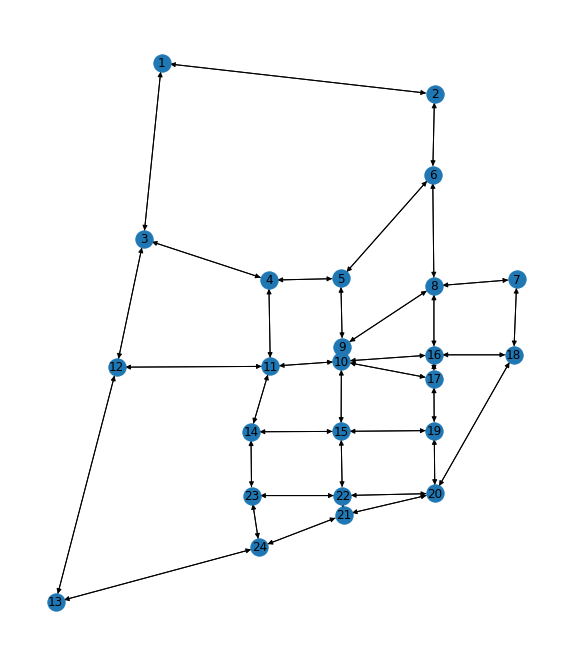

In [28]:
ax,fig=plt.subplots(figsize=(10,12))
nx.draw(G, pos_coord,with_labels = True)

#### A better looking graph  with origin and destination showing in different colors:

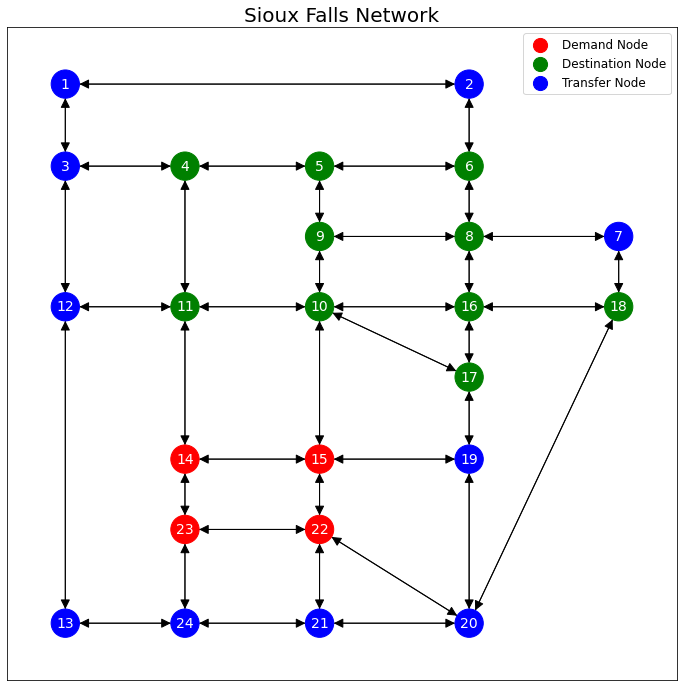

In [103]:
colors=[n[1]['color'] for n in G.nodes.data()]      
ax,fig=plt.subplots(figsize=(12,12))
nx.draw_networkx(G,pos=pos_xy,with_labels=True,node_color=colors,arrows=True,arrowsize=20,node_size=800,font_color='white',font_size=14)

color_node_type= {'red':'Demand Node', 'green': 'Destination Node','blue':'Transfer Node'}
for c,n in color_node_type.items():
    fig.scatter([],[], c=c, label=n,s=200)
    fig.legend(loc='upper right',fontsize=12)

fig.set_title('Sioux Falls Network', fontsize=20)
plt.savefig('siux-falls-network.png')

Lets create a same visulization with actual coordinates and save it:

In [ ]:
colors=[n[1]['color'] for n in G.nodes.data()]      
ax,fig=plt.subplots(figsize=(12,12))
nx.draw_networkx(G,pos=pos_coord,with_labels=True,node_color=colors,arrows=True,arrowsize=20,node_size=800,font_color='white',font_size=14)

color_node_type= {'red':'Demand Node', 'green': 'Destination Node','blue':'Transfer Node'}
for c,n in color_node_type.items():
    fig.scatter([],[], c=c, label=n,s=200)
    fig.legend(loc='upper right',fontsize=12)

fig.set_title('Actual Sioux Falls Network', fontsize=20)
plt.savefig('actual-siux-falls-network.png')

### Node and Link Attributes:

In [55]:
# Checkout node atttibutes
[*G.nodes.data()]

[(1,
  {'pos_coord': (-96.77041974, 43.61282792),
   'pos_xy': (50000, 510000),
   'color': 'blue',
   'O/D': 'transfer_node'}),
 (2,
  {'pos_coord': (-96.71125063, 43.60581298),
   'pos_xy': (320000, 510000),
   'color': 'blue',
   'O/D': 'transfer_node'}),
 (3,
  {'pos_coord': (-96.77430341, 43.5729616),
   'pos_xy': (50000, 440000),
   'color': 'blue',
   'O/D': 'transfer_node'}),
 (6,
  {'pos_coord': (-96.71164389, 43.58758553),
   'pos_xy': (320000, 440000),
   'color': 'green',
   'O/D': 'destination',
   'capacity': 6000}),
 (4,
  {'pos_coord': (-96.74716843, 43.56365362),
   'pos_xy': (130000, 440000),
   'color': 'green',
   'O/D': 'destination',
   'capacity': 5000}),
 (12,
  {'pos_coord': (-96.78013678, 43.54394065),
   'pos_xy': (50000, 320000),
   'color': 'blue',
   'O/D': 'transfer_node'}),
 (5,
  {'pos_coord': (-96.73156909, 43.56403357),
   'pos_xy': (220000, 440000),
   'color': 'green',
   'O/D': 'destination',
   'capacity': 4000}),
 (11,
  {'pos_coord': (-96.746840

In [36]:
# Checkout link atttibutes
[*G.edges.data()]

[(1,
  2,
  {'capacity': 25900.20064,
   'length': 6,
   'free_flow_time': 6,
   'b': 0.15,
   'power': 4,
   'speed': 0,
   'toll': 0,
   'link_type': 1,
   'edge': 1,
   'flow': 4494.6576464564205,
   'cost': 6.00081623735432}),
 (1,
  3,
  {'capacity': 23403.47319,
   'length': 4,
   'free_flow_time': 4,
   'b': 0.15,
   'power': 4,
   'speed': 0,
   'toll': 0,
   'link_type': 1,
   'edge': 2,
   'flow': 8119.079948047809,
   'cost': 4.008690750207941}),
 (2,
  1,
  {'capacity': 25900.20064,
   'length': 6,
   'free_flow_time': 6,
   'b': 0.15,
   'power': 4,
   'speed': 0,
   'toll': 0,
   'link_type': 1,
   'edge': 3,
   'flow': 4519.079948047809,
   'cost': 6.000834122995382}),
 (2,
  6,
  {'capacity': 4958.180928,
   'length': 5,
   'free_flow_time': 5,
   'b': 0.15,
   'power': 4,
   'speed': 0,
   'toll': 0,
   'link_type': 1,
   'edge': 4,
   'flow': 5967.336396171377,
   'cost': 6.573598255386801}),
 (3,
  1,
  {'capacity': 23403.47319,
   'length': 4,
   'free_flow_time': 4